### Importing the required Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [153]:
df = pd.read_csv('Abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [154]:
df.shape

(4177, 9)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


''' According to the information in dataset, there are 4177 rows and 9 columns and obsolutely no null values.
* 1 - Object Type
* 7 - Float Type
* 1 - Int Type

### Preprocessing

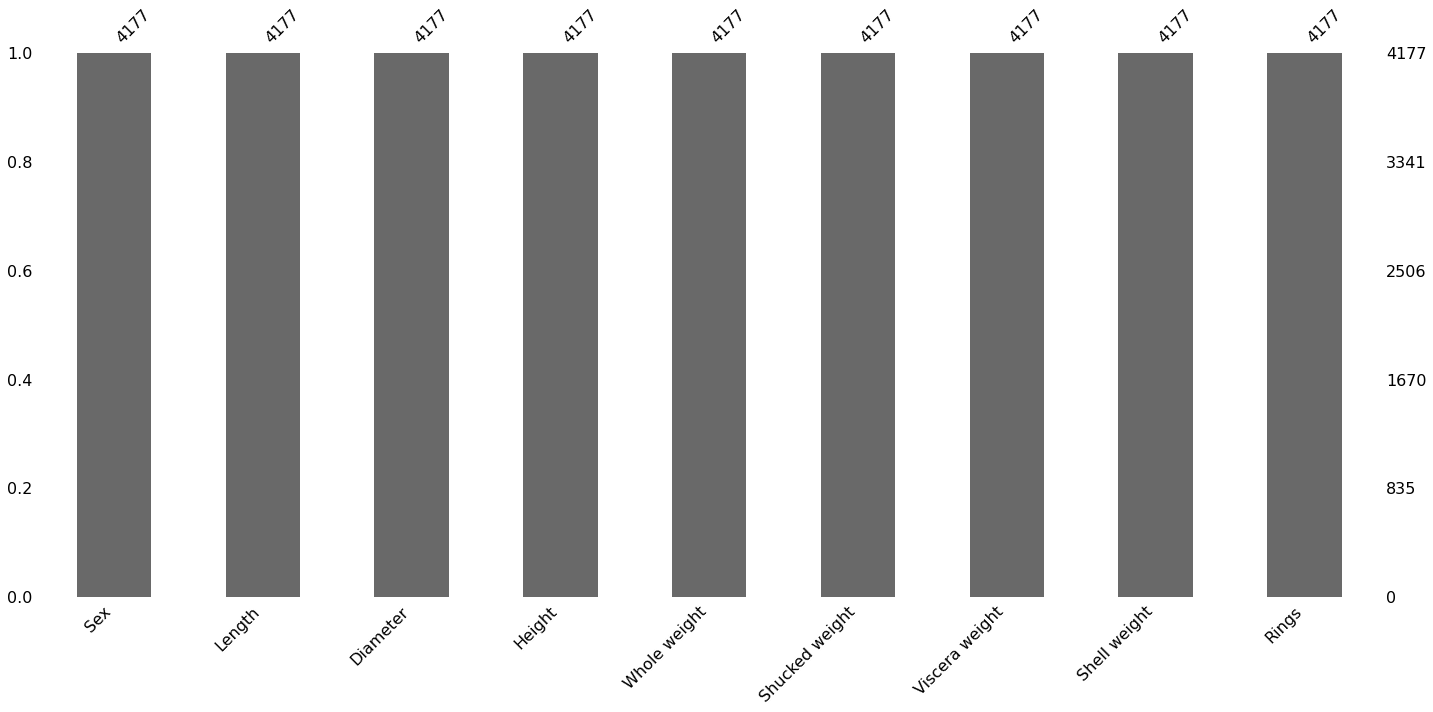

In [155]:
''' # Visualizing whether we have null values or not. '''
msno.bar(df)

''' We can clearly notice that we dont have the null values here. '''

In [156]:
''' Feature Distribution of data for Float and Int Data Type '''
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


''' Accoring to Described Information '''
* No Feature has minimum value = 0, except Height
* All features are not Normally distributed. (Theoritically if feature is normally distributed, Mean=Median=Mide)
* But features are close to Normality
* All numerical, except Sex
* Each feature has different scale

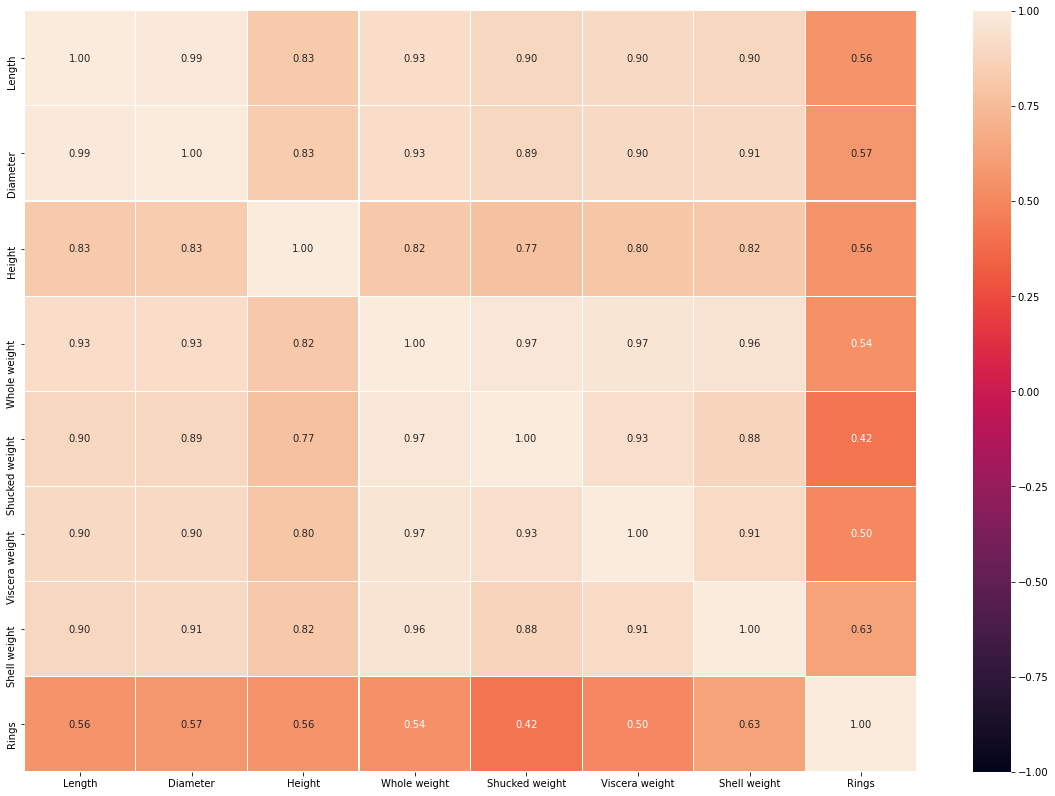

In [157]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='white',fmt='0.2f',vmin=-1)

'''As we can see from the above heatmap most of the columns are correlated with the target variable i.e Rings'''

In [158]:
''' Numerical Features and Categorical Features '''
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [159]:
''' List of Numerical Features'''
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [160]:
''' List of Cateforical Features '''
cf

Index(['Sex'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC7D91DD30>,
      dtype=object)

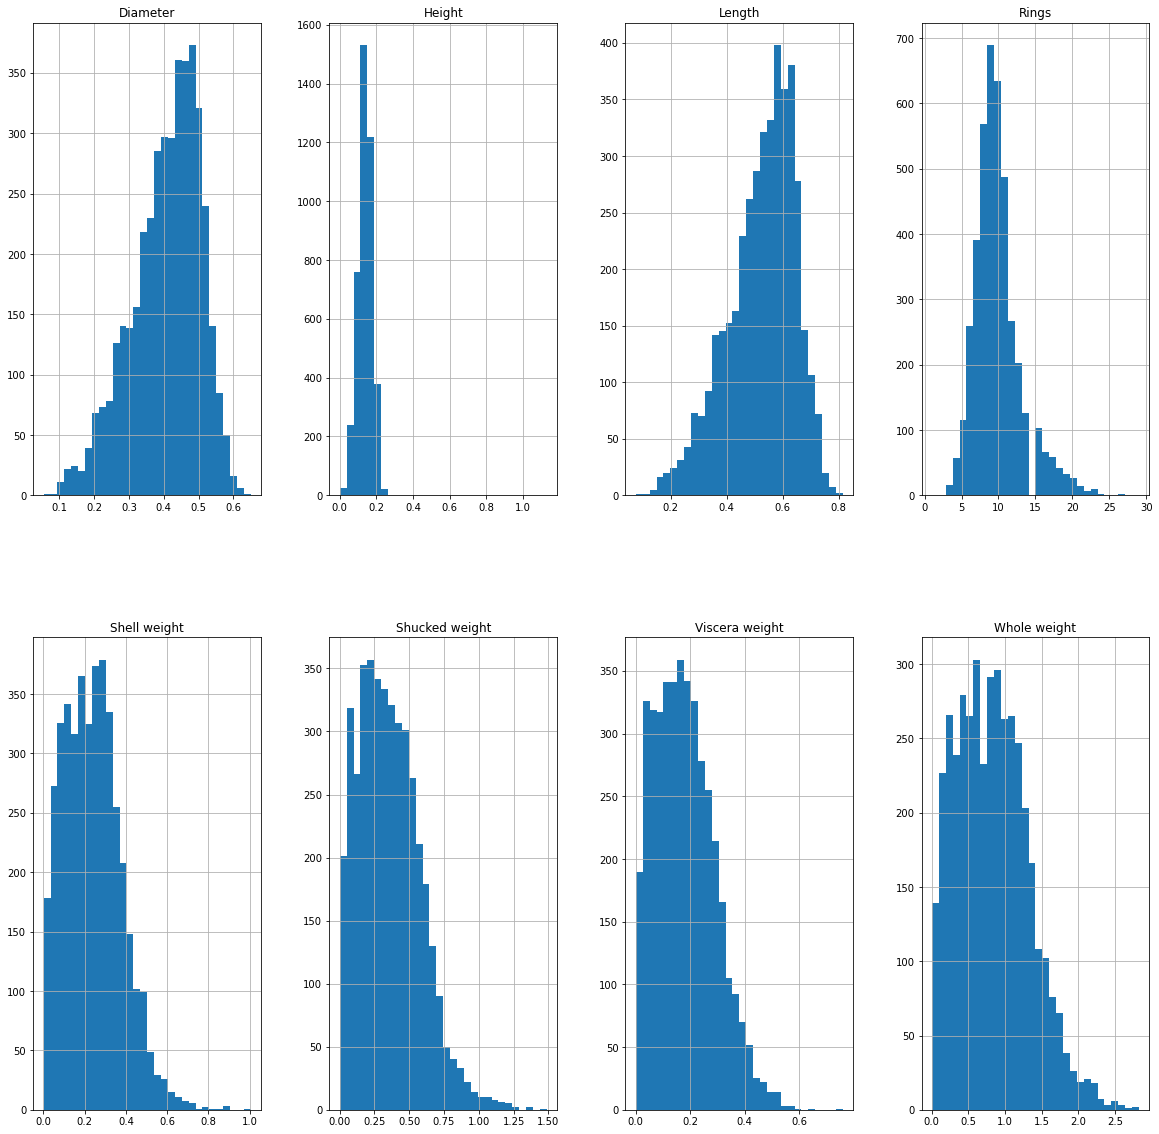

In [161]:
df.hist(figsize=(20,20),grid=True,layout = (2,4), bins=30)

''' After observing the above Graph of Data Distribution, it feels that the data is skewed, So checking for skewness'''

In [162]:
# sending all numerical features and omitting nan values.
from scipy.stats import skew
skew_list = skew(df[nf],nan_policy='omit')

In [163]:
skew_list_df = pd.concat([pd.DataFrame(nf, columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis=1)

In [164]:
skew_list_df.sort_values(by='Skewness',ascending=False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


Accoding to the rules
* For a normally Distributed Data, skewness should be greater than 0
* Skewness>0, more weight is onthe right tail of the distribution

In [165]:
""" ### Target Column Analysis """
print("value Count of Rings Column")
print(df.Rings.value_counts())
print('\nPercentage of Rings Column')
print(df.Rings.value_counts(normalize = True)*100)

value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     16.495092
10    15.178358
8     13.598276
11    11.659085
7      9.360785
12     6.392147
6      6.200622
13     4.859947
14     3.016519
5      2.753172
15     2.465885
16     1.604022
17     1.388556
4      1.364616
18     1.005506
19     0.766100
20     0.622456
3      0.359109
21     0.335169
23     0.215466
22     0.143644
24     0.047881
27     0.047881
1      0.023941
25     0.023941
2      0.023941
26     0.023941
29     0.023941
Name: Rings, dtype: float64


In [166]:
''' No of Classes in Target '''
print(len(df.Rings.unique()))

28


### Visualization

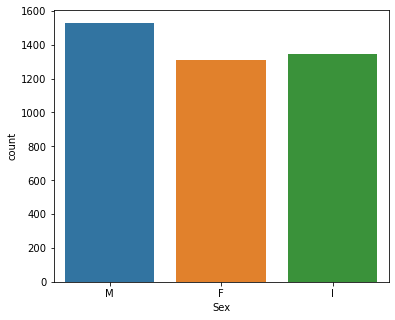

In [167]:
''' Sex Count of Abalone, M - Male, F - Female, I - Infant '''
plt.figure(figsize=(6,5))
sns.countplot(x='Sex',data=df)
plt.show()

In [168]:
""" ### Sex Ration in Abalone """
print("'\nSex Count in Numbers'")
print(df.Sex.value_counts())
print('\nSex Count in Persentage')
print(df.Sex.value_counts(normalize = True)*100)

'
Sex Count in Numbers'
M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Sex Count in Persentage
M    36.581278
I    32.128322
F    31.290400
Name: Sex, dtype: float64


In [169]:
''' Feature Engineering, Deriving Age from Rings Column, Age = Rings + 1.5 '''
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

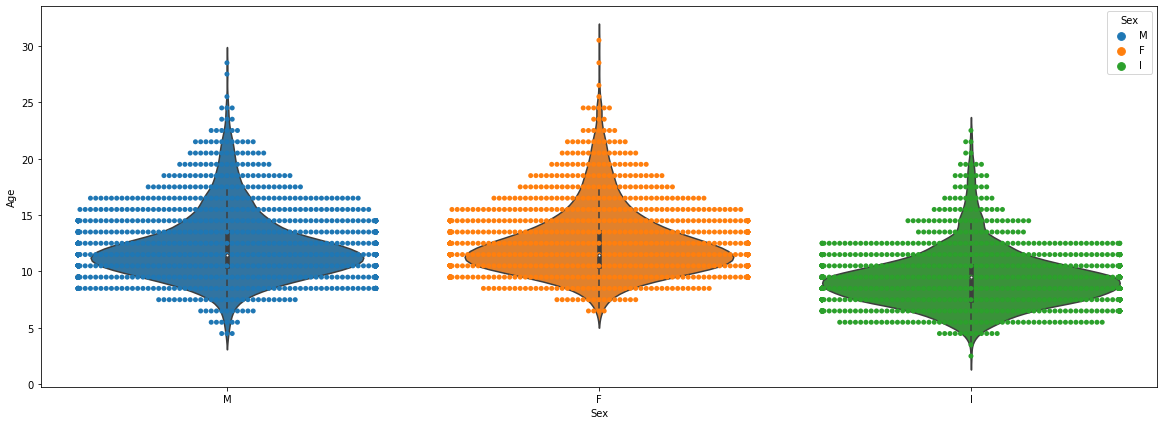

In [170]:
''' Now its time visualize the Sex and Age '''
plt.figure(figsize=(20,7))
sns.swarmplot(x='Sex',y='Age',data=df,hue='Sex')
sns.violinplot(x='Sex',y='Age',data=df)
plt.show()

''' According to the above Graph '''
* Male : Majority between 7.5 to 19
* Female : Majority between 8 to 19
* Infant : Majority between 6 to <14

In [171]:
df.groupby('Sex')[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']].mean().sort_values(by='Age',ascending=False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


''' With the above details we are able to figure out what is the mean age of each sex category '''

### Preprocessing the Data for Model

In [172]:
''' LabelEncoding the categorical Data '''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE = LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'].tolist())

In [173]:
''' One Hot Encoding for Sex Feature '''
OE = OneHotEncoder()
transformed_sex_feature = OE.fit_transform(df['Sex'].values.reshape(-1,1)).toarray()

In [174]:
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ['Sex_'+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded],axis = 1)

In [175]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


Data Splitting for Model
* Learning Features
* Predicting Features
* Train & Test Split

### Ligistic Regression
No of Classes: 28

In [176]:
''' Learning Features and Predicting Features '''
x = df.drop(['Rings','Age','Sex'], axis = 1)
y = df['Rings']

In [177]:
''' Train Test Split, 70:30 ratio '''
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [178]:
LR = LogisticRegression() ## creating object of Logistic Regression
LR.fit(x_train,y_train) ## Learning from Training Set
predLR = LR.predict(x_test) ## Predicting for Training Set
print(accuracy_score(y_test,predLR)*100) ## Accuracy Score

26.475279106858054


### Logistic Regression
No of Classes: 2
    * 1 - Rings>10
    * 0 - Rings<=10

In [179]:
''' Creating New Target Variable '''
df['newRings'] = np.where(df['Rings']>10,1,0)

In [180]:
''' Learning Features and Predicting Features '''
x = df.drop(['newRings','Rings','Age','Sex'], axis = 1)
y = df['newRings']

In [181]:
''' Train Test Split, 70:30 ratio '''
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [182]:
LR = LogisticRegression() ## creating object of Logistic Regression
LR.fit(x_train,y_train) ## Learning from Training Set
predLR = LR.predict(x_test) ## Predicting for Training Set
print(accuracy_score(y_test,predLR)*100) ## Accuracy Score

77.11323763955343


This is a multi class classification: When you have one target column with 3 or more discreet values to predict, you state the problem as multi class classification

''' We will try with all 28 classes in the target column, using linera kernel, Regularization parameter value as 1, and gamma '''

### Support Vector Machine

In [183]:
from sklearn.svm import SVC

In [184]:
''' Learning Features and Predicting Features '''
x = df.drop(['Rings','Age','Sex'], axis = 1)
y = df['Rings']

In [185]:
''' Train Test Split, 70:30 ratio '''
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [187]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))

0.36762360446570974


We can see that the Model accuracy has been increased with SVM, and it is 37 percent.
* Lets try and redice the number of classes and see how the model is performing

In [189]:
''' Lets make a copy of the primary Dataset '''
new_df = df.copy()

In [191]:
''' Feature Engineering, class 1= 1-, class 2 - 9-8, class 3 - 11> '''
new_df['newRings_1'] = np.where(df['Rings'] <=8,1,0)
new_df['newRings_2'] = np.where(((df['Rings']>8) & (df['Rings'] <=10)),2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [194]:
new_df['newRings'] = new_df['newRings_1']+new_df['newRings_2']+new_df['newRings_3']

In [195]:
''' Learning Features and Predicting Features '''
x = new_df.drop(['Rings','Age','Sex', 'newRings_1','newRings_2','newRings_3'], axis = 1)
y = new_df['newRings']

In [196]:
''' Train Test Split, 70:30 ratio '''
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [200]:
svc=SVC(kernel='rbf',C=1,gamma=100)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc)*100)

98.32535885167464


We did not remove any outliers as we had to capture all types of different shapes and weights of abalone. But with less number of classes, SVM is giving an accuracy of 98%. Now lets run the cross validation to check if any overfitting issues.

In [203]:
from sklearn.model_selection import cross_val_score, GridSearchCV
SCR=cross_val_score(svc,x,y,cv=5)
print('Cross Validation score of SVM Model is :',SCR.mean())

Cross Validation score of SVM Model is : 0.9909010686760451


With the cross validation we received a score of 99% which means the model is perfoming better.

### Saving the Model

In [208]:
import pickle
filename = 'Abalone.pkl'
pickle.dump(svc,open(filename,'wb'))

### Conclusion

In [209]:
loaded_mod=pickle.load(open('Abalone.pkl','rb'))
result = loaded_mod.score(x_test,y_test)
print(result)

0.9832535885167464


Now the model is perfoming at 98%

In [211]:
conclusion=pd.DataFrame([loaded_mod.predict(x_test)[:],predsvc[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253
Predicted,2,1,3,2,3,3,1,1,1,2,...,2,1,1,1,1,3,1,1,3,1
Original,2,1,3,2,3,3,1,1,1,2,...,2,1,1,1,1,3,1,1,3,1
